# Function Visualization

- 가장 기본적으로 matplotlib를 사용하여 함수값을 그래프로 나타내는법을 알아봅니다.

In [1]:
# 모듈 임포트
import numpy as np # numpy
import matplotlib.pyplot as plt # matplotlib

NameError: name 'p' is not defined

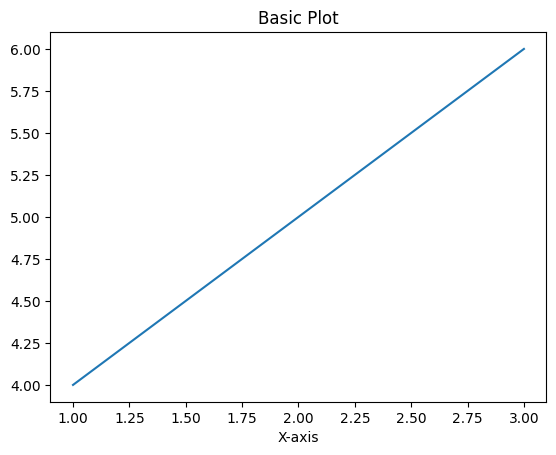

In [4]:
x = [1,2,3]
y = [4,5,6]

plt.plot(x,y)
plt.title("Basic Plot")
plt.xlabel("X-axis")
p;t.ylabel("Y-axis")
plt.show()

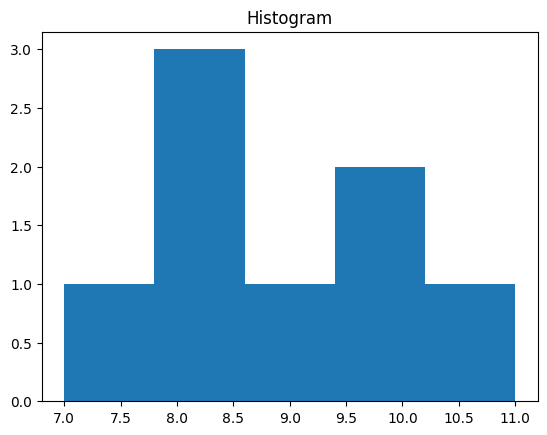

In [5]:
data = [7, 8, 8, 8, 9, 10, 10, 11]
plt.hist(data, bins=5)
plt.title("Histogram")
plt.show()

In [146]:
import seaborn as sns

df = sns.load_dataset('titanic')
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [147]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [148]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [150]:
df.drop(columns=['deck','embarked','embark_town'],inplace=True)


In [151]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,no,True


In [152]:
df.isnull().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
class           0
who             0
adult_male      0
alive           0
alone           0
dtype: int64

In [153]:
df['age'] = df['age'].fillna(df['age'].median())

In [154]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [155]:
categorical_columns = df.select_dtypes(include="object").columns
numerical_columns = df.select_dtypes(include="number").columns



In [156]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,no,True


In [157]:
df['pclass'] = pd.factorize(df['pclass'])[0]

In [158]:
import pandas as pd   
df = pd.get_dummies(df.drop(columns=['alive']),drop_first=True)
df.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,class_Second,class_Third,who_man,who_woman
0,0,0,22.0,1,0,7.2500,True,False,True,False,True,True,False
1,1,1,38.0,1,0,71.2833,False,False,False,False,False,False,True
2,1,0,26.0,0,0,7.9250,False,True,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,False,False,False,False,False,False,True
4,0,0,35.0,0,0,8.0500,True,True,True,False,True,True,False


In [159]:
X = df.drop(columns = ['survived'])
y = df['survived']

In [160]:
# x,y 나누기 split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.33,random_state=3)

In [161]:
# 표준화
from sklearn.preprocessing import StandardScaler
import numpy as np
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [162]:
df.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,class_Second,class_Third,who_man,who_woman
0,0,0,22.0,1,0,7.2500,True,False,True,False,True,True,False
1,1,1,38.0,1,0,71.2833,False,False,False,False,False,False,True
2,1,0,26.0,0,0,7.9250,False,True,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,False,False,False,False,False,False,True
4,0,0,35.0,0,0,8.0500,True,True,True,False,True,True,False


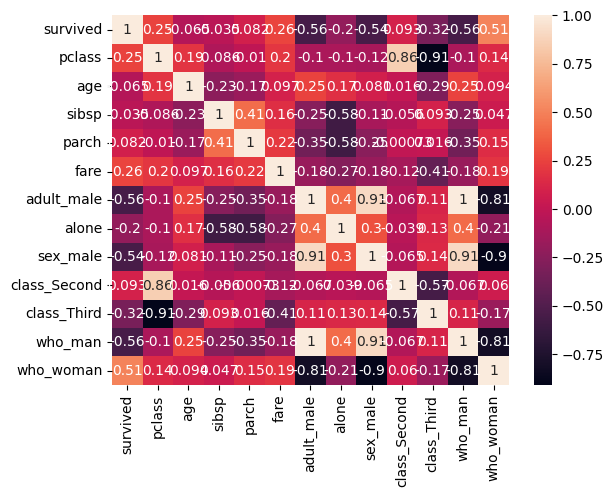

In [163]:
corr = df.corr()

sns.heatmap(corr,annot=True)
plt.show()

In [164]:
target_corr = corr['survived'].sort_values(ascending = False)

In [165]:
target_corr

survived        1.000000
who_woman       0.506562
fare            0.257307
pclass          0.247845
class_Second    0.093349
parch           0.081629
sibsp          -0.035322
age            -0.064910
alone          -0.203367
class_Third    -0.322308
sex_male       -0.543351
adult_male     -0.557080
who_man        -0.557080
Name: survived, dtype: float64

In [166]:
df.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,class_Second,class_Third,who_man,who_woman
0,0,0,22.0,1,0,7.2500,True,False,True,False,True,True,False
1,1,1,38.0,1,0,71.2833,False,False,False,False,False,False,True
2,1,0,26.0,0,0,7.9250,False,True,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,False,False,False,False,False,False,True
4,0,0,35.0,0,0,8.0500,True,True,True,False,True,True,False


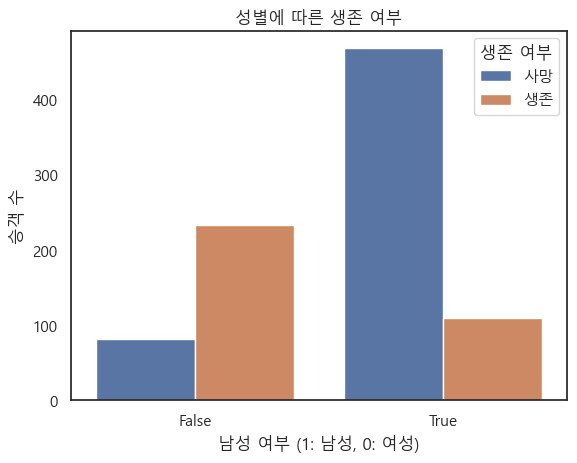

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

sns.countplot(data = df,x='sex_male',hue="survived")
plt.title("성별에 따른 생존 여부")
plt.xlabel("남성 여부 (1: 남성, 0: 여성)")
plt.ylabel("승객 수")
plt.legend(["사망","생존"], title="생존 여부")
plt.show()

## 기본 플로팅

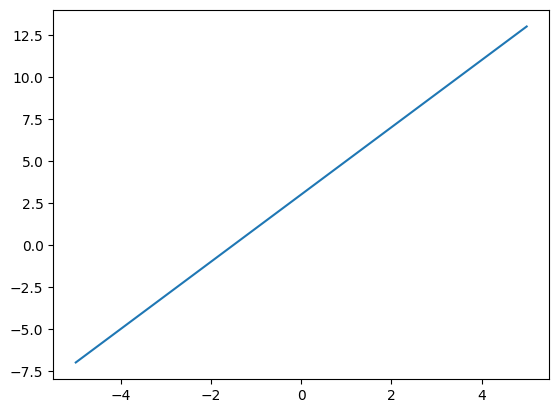

In [2]:
x = np.linspace(-5, 5, 50)
y1 = 2 * x + 3

fig = plt.figure()
ax = plt.axes()

ax.plot(x, y1)
# ax.plot(x, y1, '.', color='k')

plt.show()

In [ ]:
x = np.linspace(-5, 5, 50)
y1 = 2 * x + 3

fig = plt.figure()
ax = plt.axes()

ax.plot

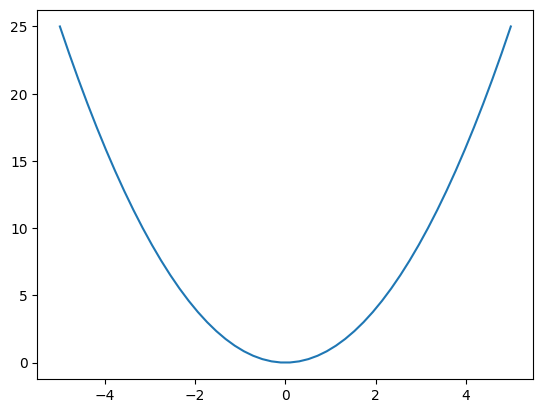

In [3]:
# x의 범위가 -5, 5까지인 y=x**2 그래프를 그래보기

x = np.linspace(-5, 5, 50)
y2 = x**2

fig = plt.figure()
ax = plt.axes()

ax.plot(x, y2)
plt.show()


## 두 그래프 함께 그리기

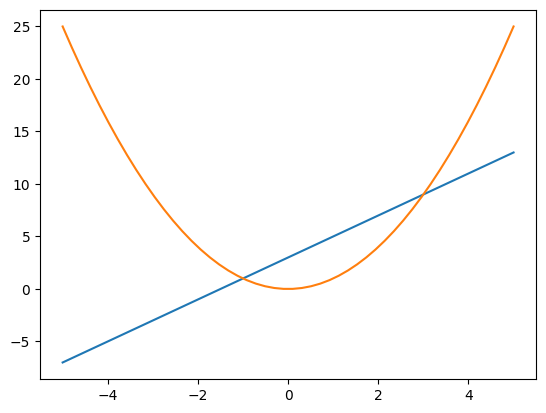

In [4]:
fig = plt.figure()
ax = plt.axes()

ax.plot(x, y1)
ax.plot(x, y2)

plt.show()

### 범례 표시

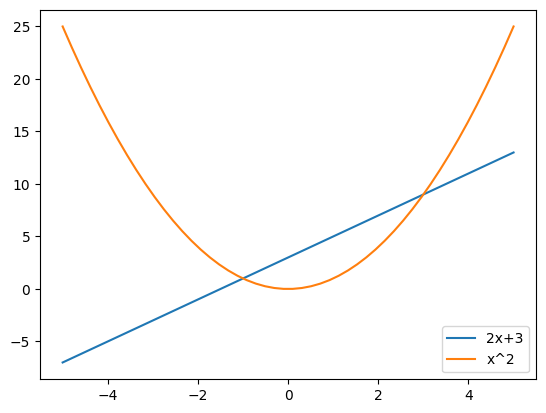

In [5]:
fig = plt.figure()
ax = plt.axes()

ax.plot(x, y1, label='2x+3')
ax.plot(x, y2, label='x^2')

plt.legend()

plt.show()

## 두 그래프를 각각 그리기

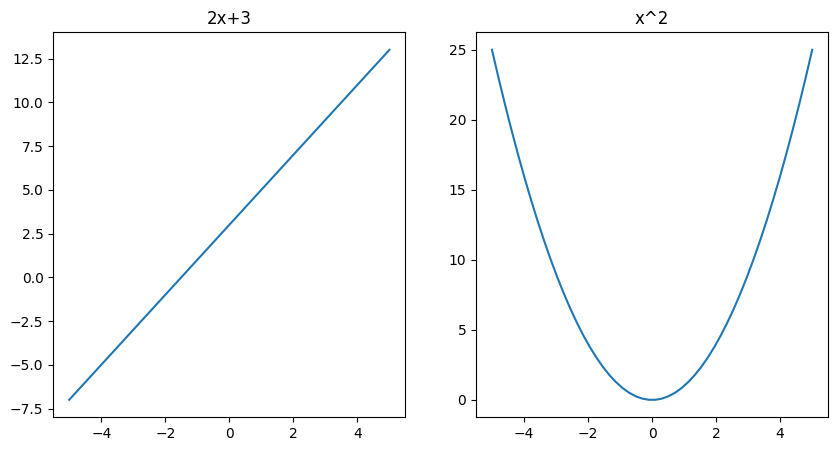

In [6]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

ax[0].plot(x, y1)
ax[0].set_title('2x+3')

ax[1].plot(x, y2)
ax[1].set_title('x^2')

plt.show()

# Data Visualization


- 데이터 시각화 툴로 기본적으로 matplotlib를 사용할 수 있지만 pandas나 seaborn 라이브러리를 사용하면 더 간편하게 많은 의미를 담은 플롯을 그릴 그 있습니다.

- 이 파일에서 데이터 분석에 사용하는 거의 대부분의 플롯을 matplotlib, pandas, seaborn을 통해 그려보도록 하겠습니다.

In [7]:
import pandas as pd # pandas

# seaborn
import seaborn as sns

In [8]:
df = sns.load_dataset('penguins')

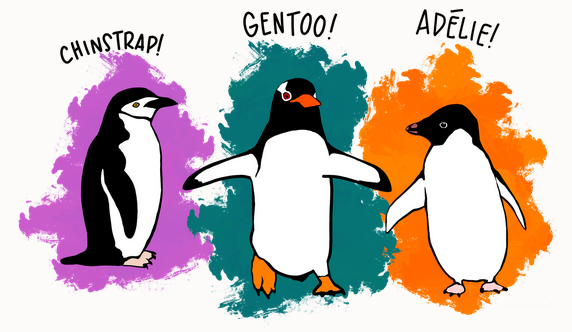

In [9]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


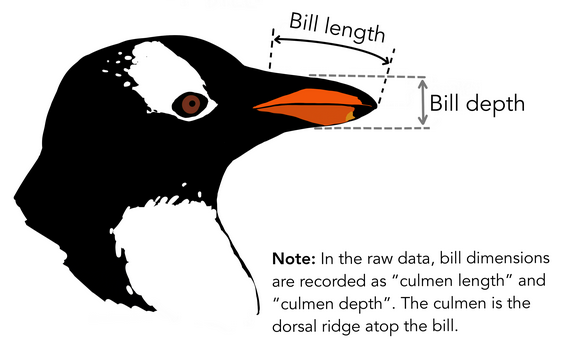

- 빈값을 확인하고 빈값을 버린 다음 `df`에 재 할당하기

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [11]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [12]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


## histplot

- 연속적인 수치 데이터를 여러 구간(빈, bins)으로 나누고, 각 구간에 속하는 데이터의 빈도 또는 수를 막대 형태로 표현

- 데이터의 분포와 패턴을 이해하는 데 사용


### pandas: Series

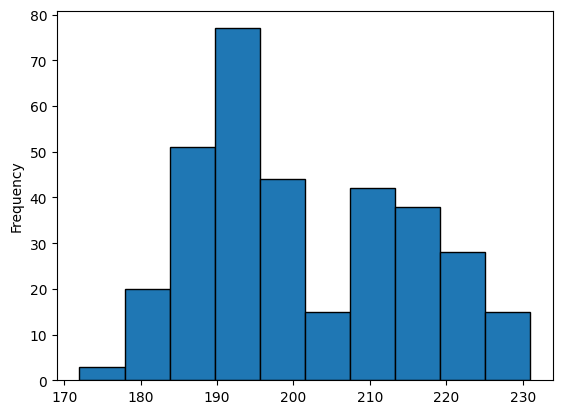

In [13]:
# histplot
df['flipper_length_mm'].plot(kind='hist', bins=10, edgecolor='k')

plt.show()

- [참고] pandas DataFrame 수준에서 `hist()`를 호출하면 각 feature별로 히스토그램을 생성

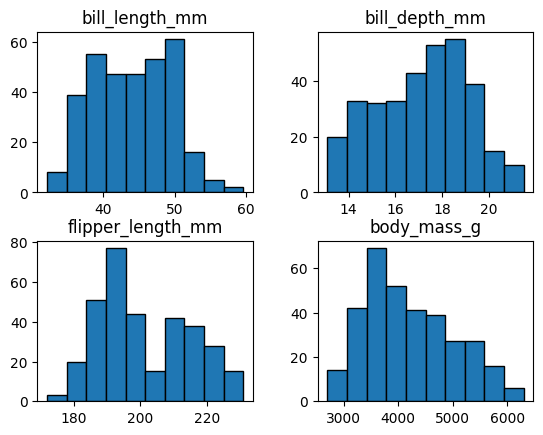

In [14]:
# DataFrame에 대한 histplot
df.hist(grid=False, ec='k')
plt.show()

### seaborn

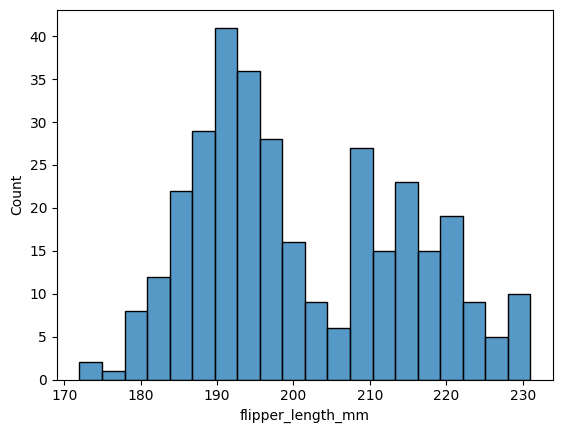

In [15]:
# histplot
sns.histplot(data=df, x='flipper_length_mm', bins=20)
plt.show()

#### 복수 플롯, 색 구분, 겹쳐 그리기

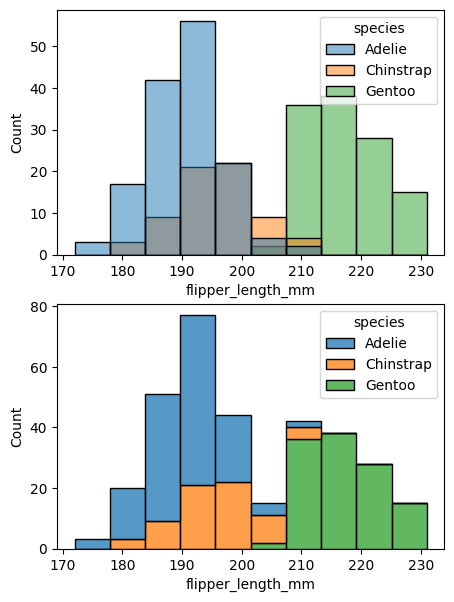

In [16]:
# histplot
fig, ax = plt.subplots(figsize=(5, 7), nrows=2, ncols=1)

sns.histplot(data=df, x='flipper_length_mm', hue='species', ax=ax[0])
sns.histplot(data=df, x='flipper_length_mm', hue='species', multiple='stack', ax=ax[1])

plt.show()

#### 분포로 나타내기

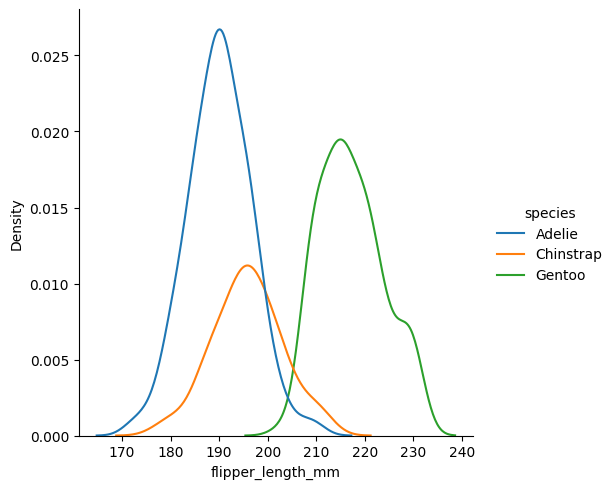

In [17]:
# displot
sns.displot(data=df, x="flipper_length_mm", hue="species", kind='kde')
plt.show()

## boxplot

- 데이터의 분포와 중앙값, 사분위수, 이상치 등을 시각화하는 도구

- 데이터의 데이터의 대칭성, 분포, 중앙 경향, 이상치를 빠르게 식별

### pandas: Series

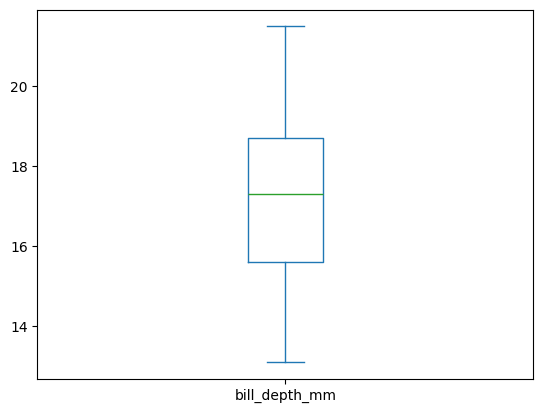

In [18]:
# boxplot
df['bill_depth_mm'].plot(kind='box')
plt.show()

- [참고] pandas DataFrame 수준에서 `plot(lind='box')`를 호출하면 각 feature별로 박스를 생성

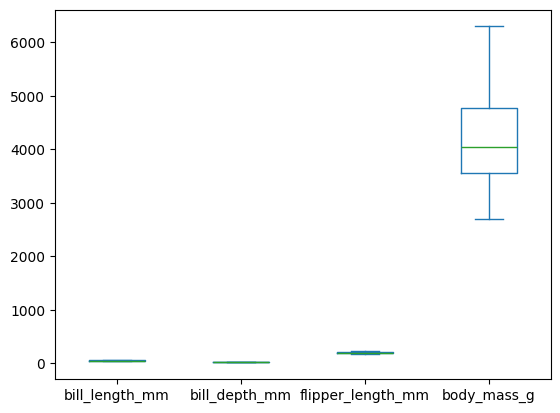

In [19]:
df.plot(kind='box')
plt.show()

- [참고] pandas DataFrame 수준에서 `plot(kind='box')`를 호출할 때 `by`옵션으로 카테고리 컬럼을 지정하면 카테고리별로 그룹시켜서 표시

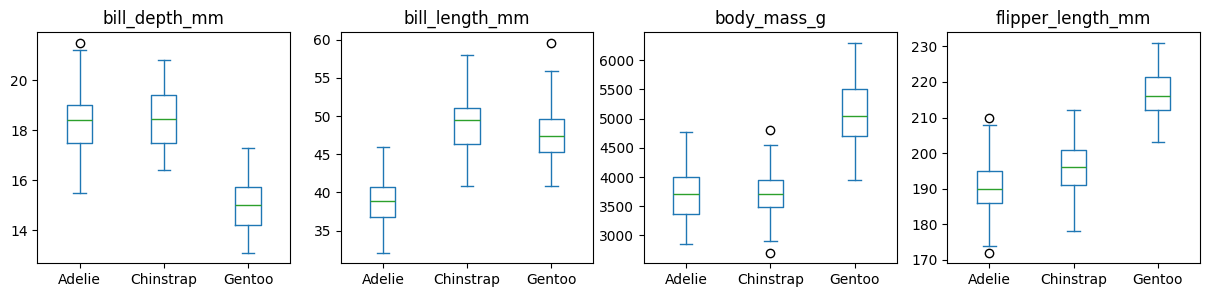

In [20]:
df.plot(kind='box', by='species', figsize=(15, 3))
plt.show()

### seaborn

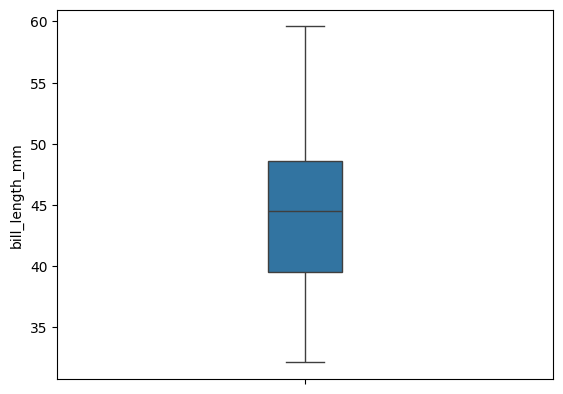

In [21]:
# boxplot
sns.boxplot(data=df, y='bill_length_mm', width=0.15)
plt.show()

#### x축을 종류로 나눠 그리기

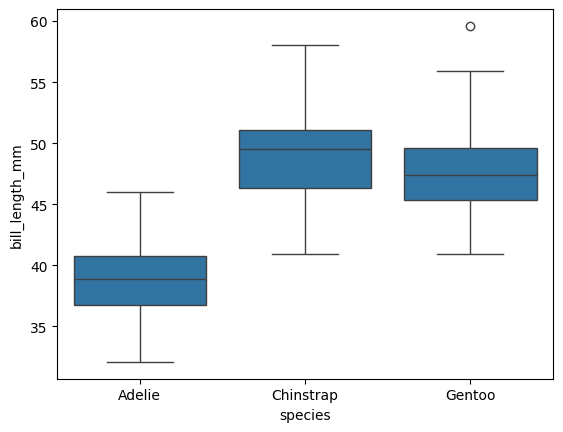

In [22]:
# 가로축을 카테고리 변수로 두고 그리기
sns.boxplot(data=df, x='species', y='bill_length_mm')
plt.show()

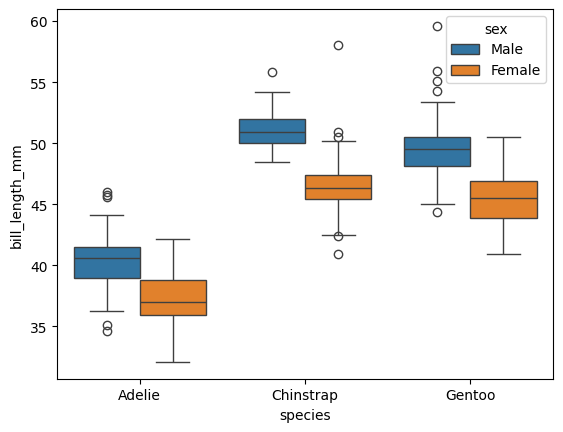

In [23]:
# 가로축을 카테고리 변수로 두고 그리기 + hue
sns.boxplot(data=df, x='species', y='bill_length_mm', hue='sex')
plt.show()

###  **[연습]** 종(species)가 'Gentoo'인 데이터에 대해서 `bill_length_mm`에 대한 박스플롯을 그리세요.

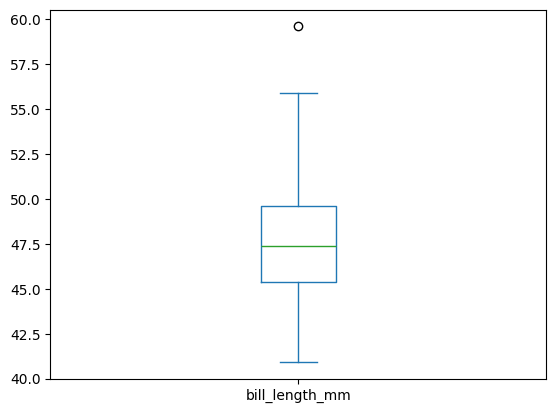

In [24]:
# pandas
df[ df['species'] == 'Gentoo' ]['bill_length_mm'].plot(kind='box')
plt.show()

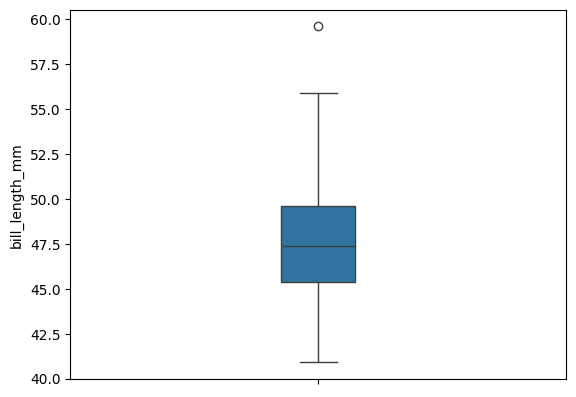

In [25]:
# seaborn
df_gentoo = df[ df['species'] == 'Gentoo' ]
sns.boxplot(data=df_gentoo, y='bill_length_mm', width=0.15)
plt.show()



## countplot

- 범주형 데이터의 각 범주에 속하는 데이터의 빈도수를 시각화하는 도구

-  수직축(y축)은 데이터의 빈도수를 나타내고, 수평축(x축)은 범주 나타냄

### pandas: Series

In [26]:
df['sex'].value_counts()

,count
sex,
Male,168
Female,165


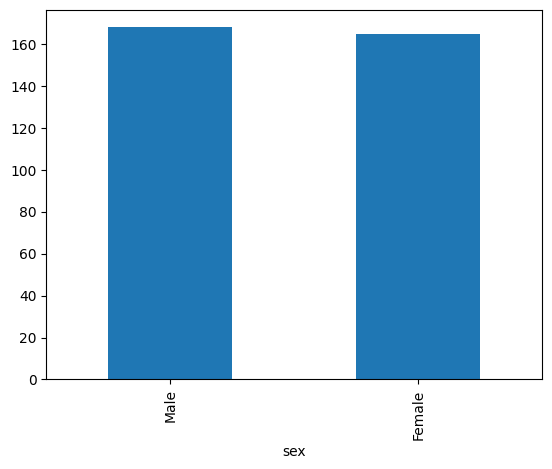

In [27]:
df['sex'].value_counts().plot(kind='bar')
plt.show()

### seaborn

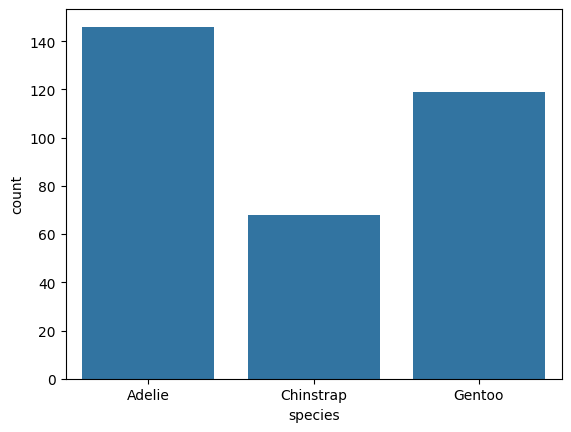

In [28]:
sns.countplot(data=df, x='species')
plt.show()


## barplot

In [29]:
# 1. counting
count_species = df['species'].value_counts()
count_species

,count
species,
Adelie,146
Gentoo,119
Chinstrap,68


### pandas: Series

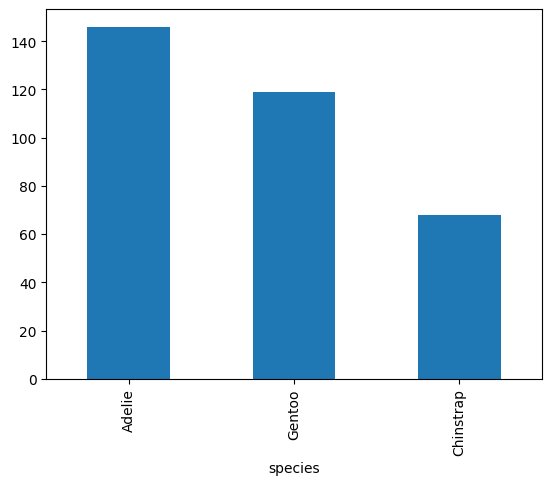

In [30]:
count_species.plot(kind='bar')
plt.show()

### seaborn

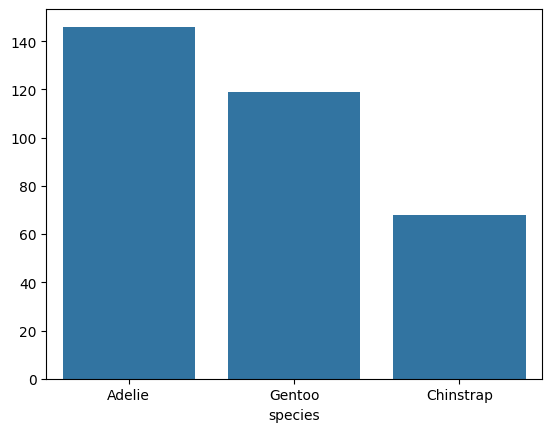

In [31]:
sns.barplot(x=count_species.index, y=count_species.values)
plt.show()

#### 정리되지 않은 수치형 데이터에 대해

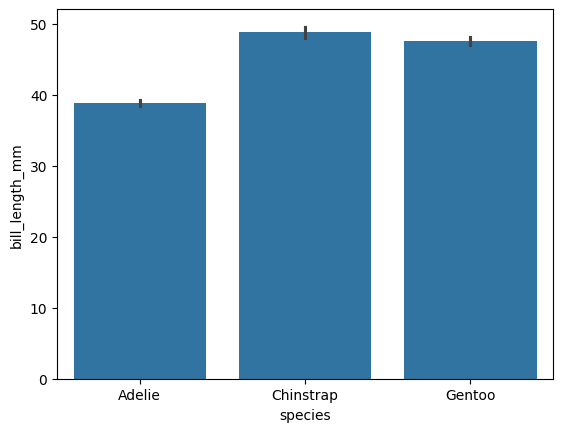

In [32]:
sns.barplot(data=df, x='species', y='bill_length_mm')
plt.show()

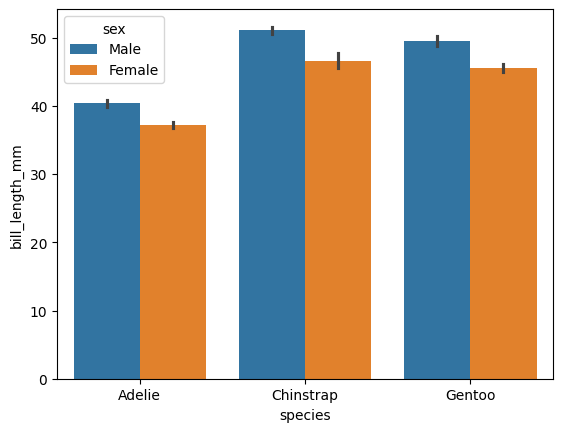

In [33]:
sns.barplot(data=df, x='species', y='bill_length_mm', hue='sex')
plt.show()


## scatterplot

- 두 변수 간의 관계를 점으로 표현하는 그래프

- 주로 두 변수 사이의 상관 관계나 패턴을 시각화하는 데 사용

### pandas: DataFrame

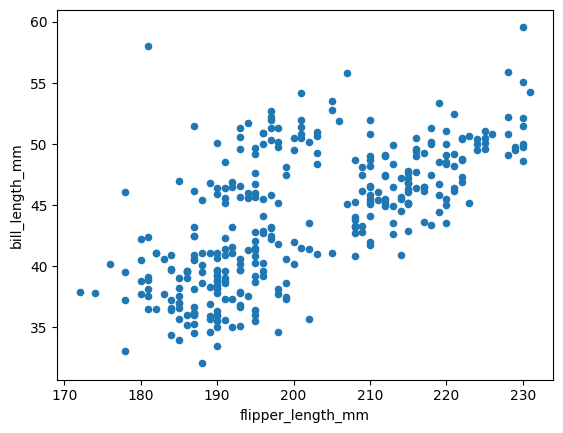

In [34]:
df.plot(kind='scatter', x='flipper_length_mm', y='bill_length_mm')
plt.show()

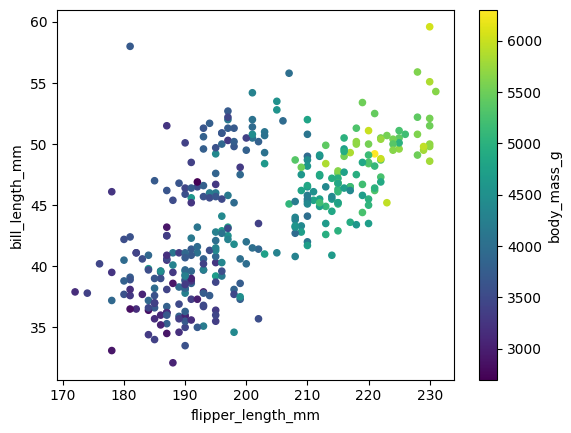

In [35]:
df.plot(kind='scatter', x='flipper_length_mm', y='bill_length_mm', c='body_mass_g')
plt.show()


### seaborn

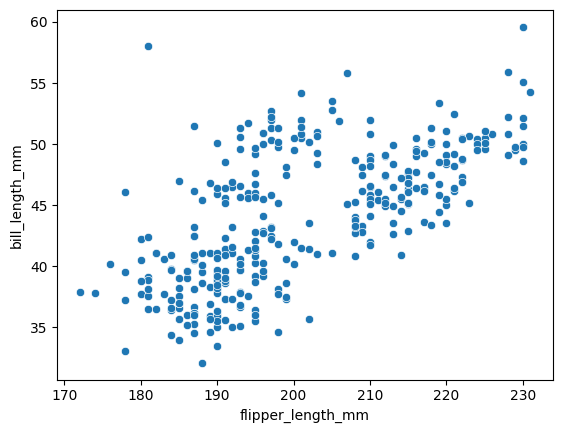

In [36]:
sns.scatterplot(data=df, x='flipper_length_mm', y='bill_length_mm')
plt.show()

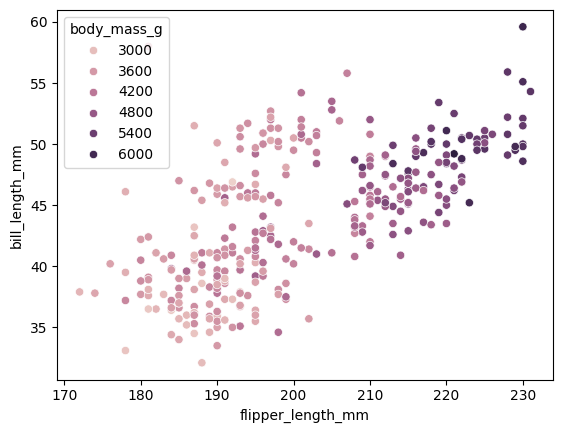

In [37]:
sns.scatterplot(data=df, x='flipper_length_mm', y='bill_length_mm',
                hue='body_mass_g')
plt.show()


###  **[연습]** 종(species)을 뚜렷하게 구분할 수 있는 scatterplot을 그리세요.

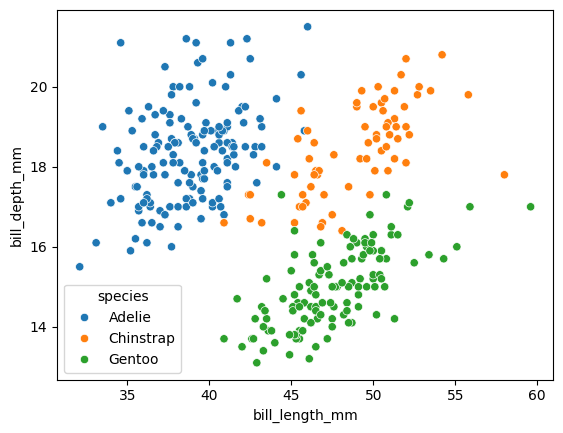

In [38]:
# x='bill_length_mm', y='bill_depth_mm' 로 scatterplot 그리고 색으로 종 구분
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.show()

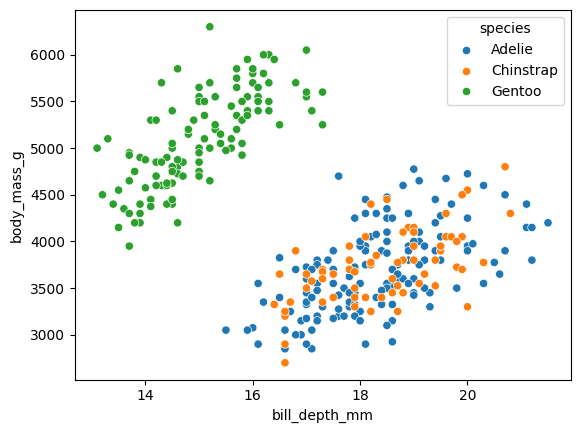

In [39]:
# x='bill_depth_mm', y='body_mass_g'로 scatterplot 그리고 색으로 종 구분
sns.scatterplot(data=df, x='bill_depth_mm', y='body_mass_g', hue='species')
plt.show()


# heatmap

- 다차원 데이터의 패턴, 클러스터, 상관 관계 등을 직관적으로 표현

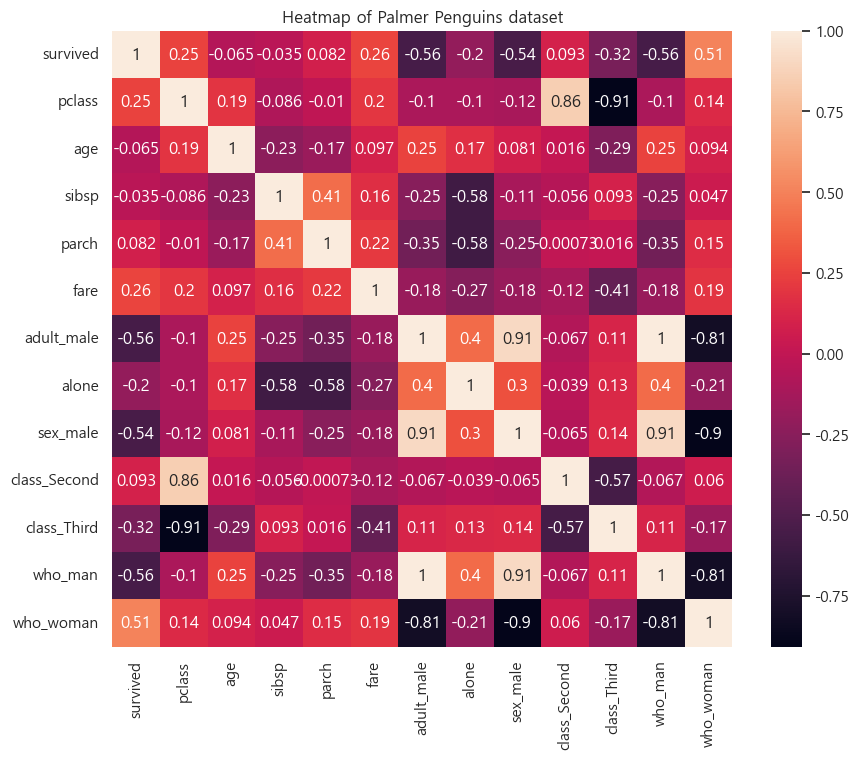

In [170]:
correlation = df.corr(numeric_only=True)

# heatmap 생성
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True)

plt.title('Heatmap of Palmer Penguins dataset')
plt.show()

### 상관관계

- 두 변수 간의 선형적인 관계를 나타내는 수치

- -1에서 1까지의 값

- 1에 가까울수록 양의 상관관계, 이는 한 변수가 증가할 때 다른 변수도 같이 증가한다는 것을 의미

- -1에 가까울수록 음의 상관관계, 이는 한 변수가 증가할 때 다른 변수가 감소한다는 것을 의미

- 0에 가까우면 상관관계가 없음

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \sqrt{ \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

In [42]:
correlation


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


In [182]:
df.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,class_Second,class_Third,who_man,who_woman
0,0,0,22.0,1,0,7.2500,True,False,True,False,True,True,False
1,1,1,38.0,1,0,71.2833,False,False,False,False,False,False,True
2,1,0,26.0,0,0,7.9250,False,True,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,False,False,False,False,False,False,True
4,0,0,35.0,0,0,8.0500,True,True,True,False,True,True,False


# 기타 플롯

## Hexbin

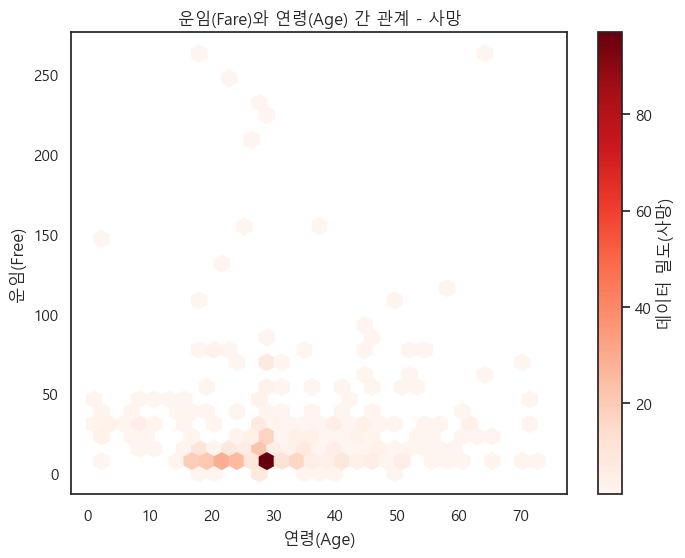

In [179]:
#사망한 승객
plt.figure(figsize=(8,6))
plt.hexbin(df[df['survived']==0]['age'],df[df["survived"]==0]['fare'],gridsize=30, cmap='Reds',mincnt=1)
plt.colorbar(label='데이터 밀도(사망)')
plt.title("운임(Fare)와 연령(Age) 간 관계 - 사망")
plt.xlabel("연령(Age)")
plt.ylabel("운임(Free)")
plt.show()

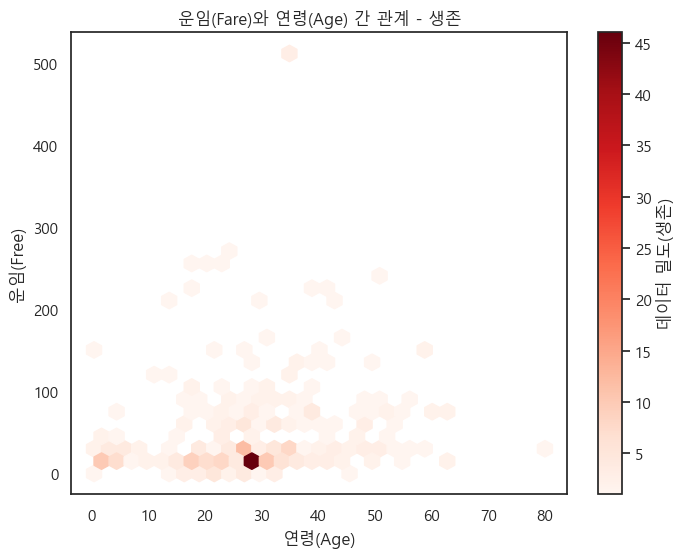

In [181]:
#사망한 승객
plt.figure(figsize=(8,6))
plt.hexbin(df[df['survived']==1]['age'],df[df["survived"]==1]['fare'],gridsize=30, cmap='Reds',mincnt=1)
plt.colorbar(label='데이터 밀도(생존)')
plt.title("운임(Fare)와 연령(Age) 간 관계 - 생존")
plt.xlabel("연령(Age)")
plt.ylabel("운임(Free)")
plt.show()

## kdeplot

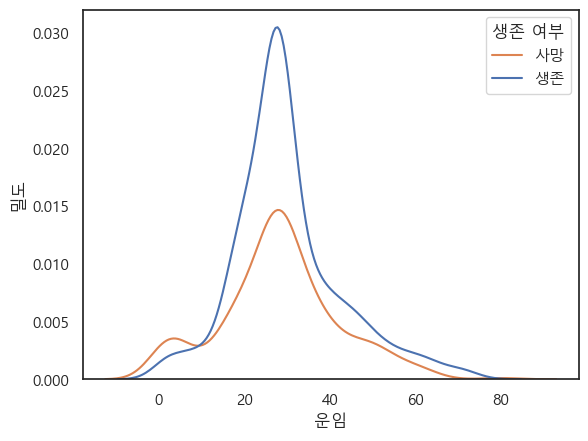

In [188]:
sns.kdeplot(data=df, x='age', hue='survived')
plt.xlabel("운임")
plt.ylabel("밀도")
plt.legend(["사망","생존"], title="생존 여부")
plt.show()

## jointplot

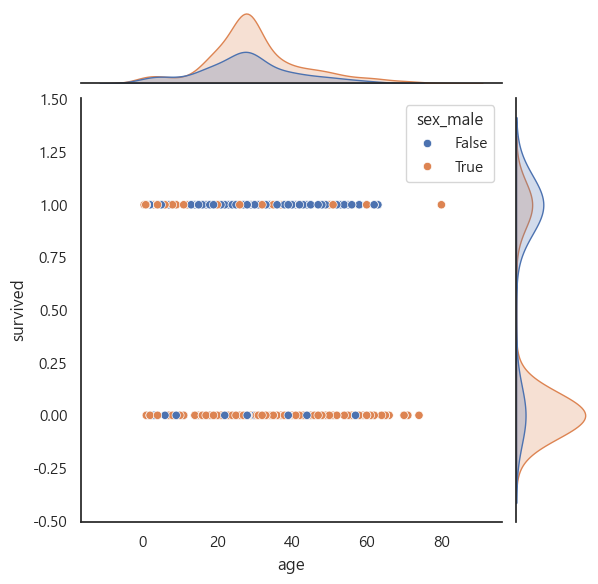

In [190]:
sns.jointplot(data=df, x='age', y='survived', hue='sex_male')
plt.show()

# 연습

- **[연습 1]** 다음과 같이 각 섬별로 데이터에 있는 개체 수를 종별로 구분해서 그리세요.

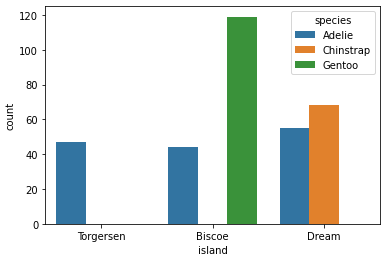

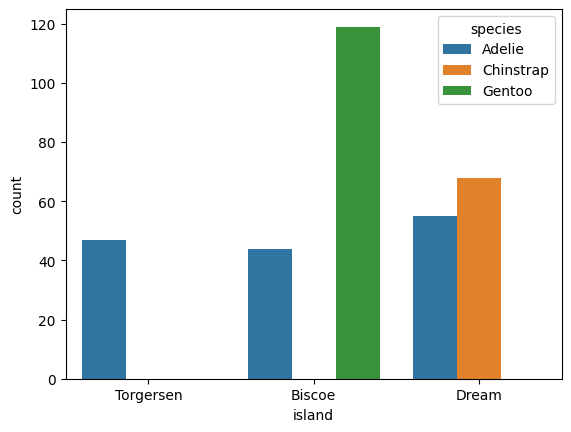

In [50]:
sns.countplot(data=df, x='island', hue='species')
plt.show()

- **[연습 2]** 성별로 구분해서 `body_mass_g`분포를 다음처럼 그리세요.

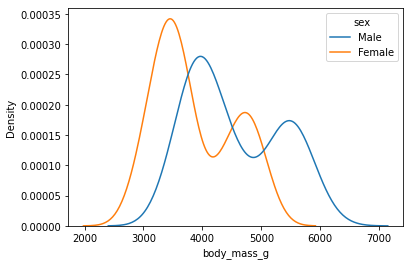

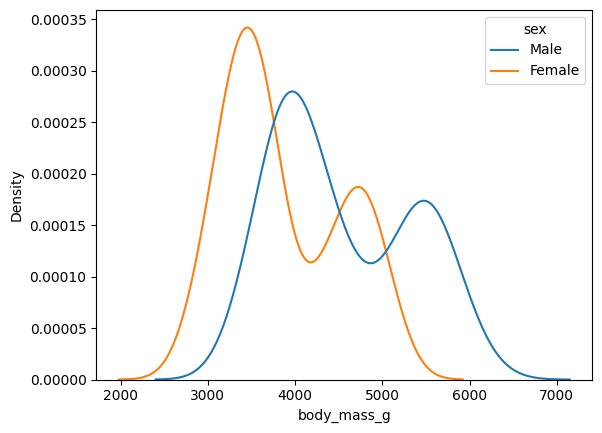

In [51]:
sns.kdeplot(data=df, x='body_mass_g', hue='sex')
plt.show()

In [52]:
!gdown 1DAi1LRchE2xCb4zROLcwYTWQQ2BUiRv3

Downloading...
From: https://drive.google.com/uc?id=1DAi1LRchE2xCb4zROLcwYTWQQ2BUiRv3
To: /content/nba.csv
100% 1.84M/1.84M [00:00<00:00, 150MB/s]


- **[연습 3]** 다운 받은 nba.csv를 판다스로 읽으세요.

In [54]:
nba_df = pd.read_csv('nba.csv', index_col=0)
nba_df.head()


,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


- **[연습 4]** `season` == `2021-22`인 데이터만 선택한 다음 `player_name`, `draft_round`, `age`, `player_height`, `player_weight`, `pts`, `reb`, `country` 컬럼만 선택하세요.

In [57]:
nba_df = nba_df[ nba_df['season'] == '2021-22' ]
nba_df = nba_df[['player_name', 'draft_round', 'age',
                 'player_height', 'player_weight',
                 'pts', 'reb', 'country']].reset_index(drop=True)
nba_df.head()


,player_name,draft_round,age,player_height,player_weight,pts,reb,country
0,Freddie Gillespie,Undrafted,25.0,205.74,111.130040,2.3,4.0,USA
1,Georges Niang,2,29.0,200.66,104.326160,9.2,2.7,USA
2,George King,2,28.0,198.12,99.790240,0.3,1.3,USA
3,George Hill,1,36.0,193.04,85.275296,6.2,2.9,USA
4,Gary Trent Jr.,2,23.0,195.58,94.800728,18.3,2.7,USA


- **[연습 5]** 1라운드와 2라운드 드래프트 선수를 구분하고 x축은 `player_height`, y축은 `player_wieght`로 각각 scatterplot을 그리세요.

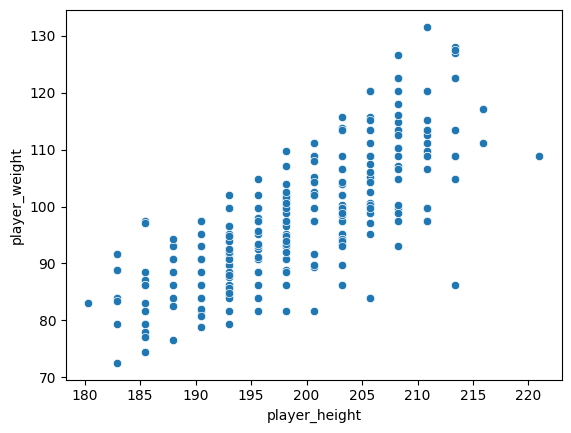

In [60]:
# 1 라운드 드래프터의 키와 몸무게의 scatter plot
sns.scatterplot(
    data = nba_df[ nba_df['draft_round'] == '1' ],
    x='player_height', y='player_weight'
)
plt.show()

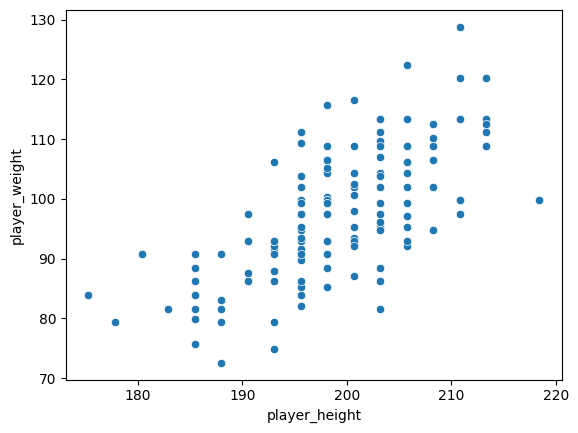

In [61]:
# 2 라운드 드래프터의 키와 몸무게의 scatter plot
sns.scatterplot(
    data = nba_df[ nba_df['draft_round'] == '2' ],
    x='player_height', y='player_weight'
)
plt.show()

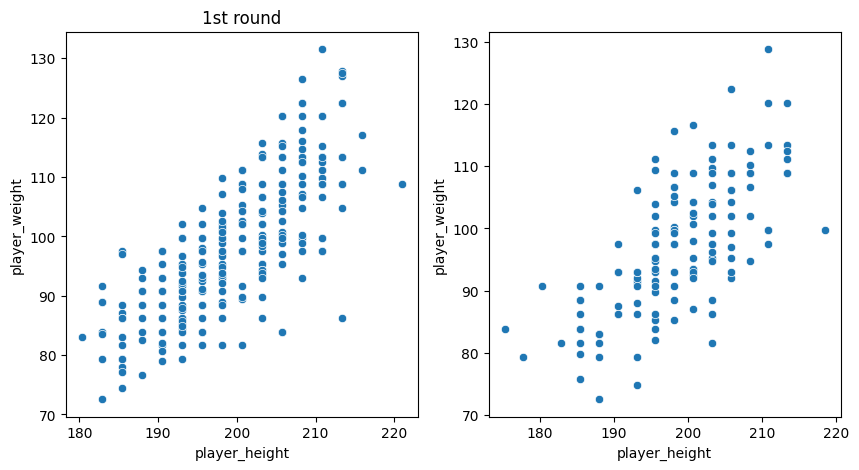

In [63]:
# subplot으로 두 그림을 1행 2열로 배치 하세요.
fig, ax = plt.subplots(figsize=(10,5), nrows=1, ncols=2)

sns.scatterplot(
    data = nba_df[ nba_df['draft_round'] == '1' ],
    x='player_height', y='player_weight',
    ax=ax[0]
)
ax[0].set_title('1st round')

sns.scatterplot(
    data = nba_df[ nba_df['draft_round'] == '2' ],
    x='player_height', y='player_weight',
    ax=ax[1]
)

plt.show()


- **[연습 6]** 드래프트 1, 2 라운드 플레이어들의 평균 키, 평균 리바운드 개수를 가지는 다음과 같은 데이터 프레임을 만드세요.
```dataframe
                  1 round     2 round
player_height  199.440072  198.596250
reb              4.434409    2.975694
```
구해진 평균 키와 리바운드 수를 1 라운드의 키와 리바운드 수로 각각 나눠누고 1라운드 선수와 1라운드 선수의 키와 리바운드 수를 비교하는 바플롯을 그리세요.

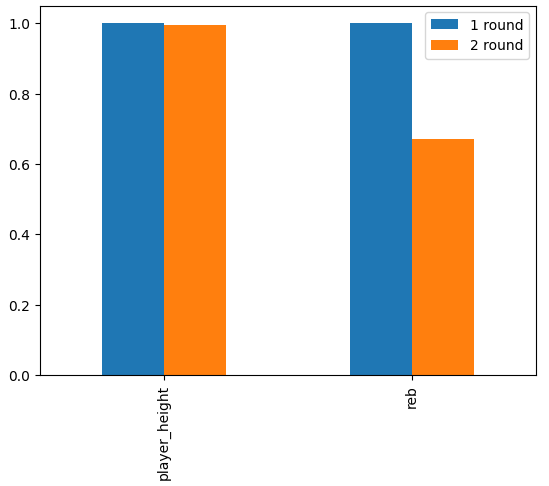

- **[연습 7]** `reb`와 키, 몸무게, 나이의 상관관계를 분석하세요.

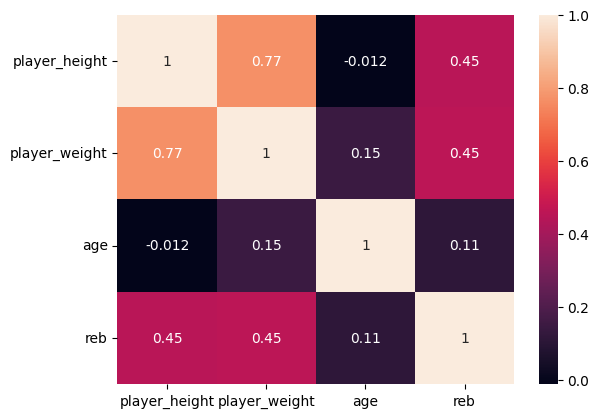

- **[연습 8]** `player_height`에 대한 박스플롯을 그리고 이상치가 있는지 여부를 판단하세요.

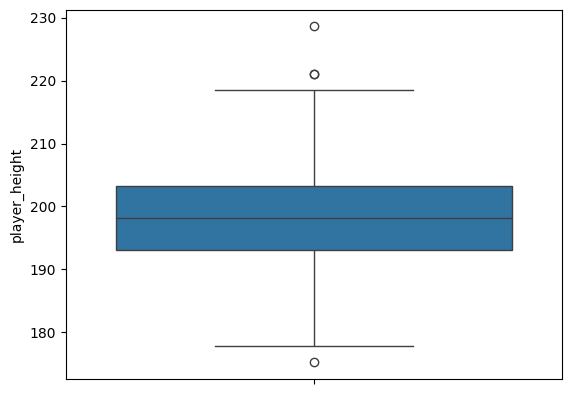

- **[연습 9]** 드래프트 1 라운드 선수들의 `player_height`, `reb`에 대한 joint plot을 그리세요.

- **[연습 10]** 각 나라별 플레이어 수를 구해 상위 4개 나라에 속하는 선수만으로 `nba_df_4nations` 데이터 프레임을 만드세요.

`nba_df_4nations`를 사용해 각 국가별 평균 득점을 막대그래프로 그리세요.

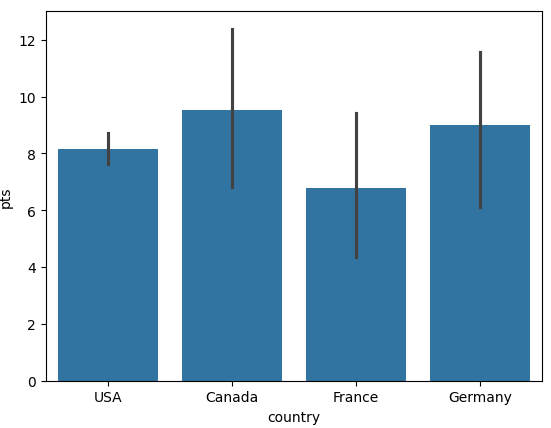

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = sns.load_dataset('penguins')
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


### 결측치 처리

In [2]:
# 결측치 처리
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [3]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [4]:
### 수치형 변수 전리리
df['bill_length_mm'] = df['bill_length_mm'].fillna(df['bill_length_mm'].mean())
df['bill_depth_mm'] = df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())
df.isnull().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

In [5]:
### 범주형 변수 전리리
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [7]:
# 범주형 범수만
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=["number"]).columns
categorical_columns 

Index(['species', 'island', 'sex'], dtype='object')

In [8]:
df_encoded = pd.get_dummies(df,columns=categorical_columns,drop_first=True)

In [9]:
df_encoded.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,39.10000,18.70000,181.000000,3750.000000,False,False,False,True,True
1,39.50000,17.40000,186.000000,3800.000000,False,False,False,True,False
2,40.30000,18.00000,195.000000,3250.000000,False,False,False,True,False
3,43.92193,17.15117,200.915205,4201.754386,False,False,False,True,True
4,36.70000,19.30000,193.000000,3450.000000,False,False,False,True,False


In [10]:
df_encoded.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'species_Chinstrap', 'species_Gentoo', 'island_Dream',
       'island_Torgersen', 'sex_Male'],
      dtype='object')

In [11]:
y = df_encoded[['species_Chinstrap','species_Gentoo']]
y

,species_Chinstrap,species_Gentoo
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
339,False,True
340,False,True
341,False,True
342,False,True


In [12]:
X = df_encoded.drop(columns=['species_Chinstrap','species_Gentoo'])

In [13]:
X_test.shape

NameError: name 'X_test' is not defined

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=34)
X_train, X_valid, y_train,y_valid = train_test_split(X_train,y_train,test_size=0.25, random_state=34)

In [45]:
# 스케일링 (표준화)
from sklearn.preprocessing import StandardScaler
import numpy as np


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_valid = scaler.fit_transform(X_valid)

In [46]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

AttributeError: module 'matplotlib' has no attribute 'suptitle'

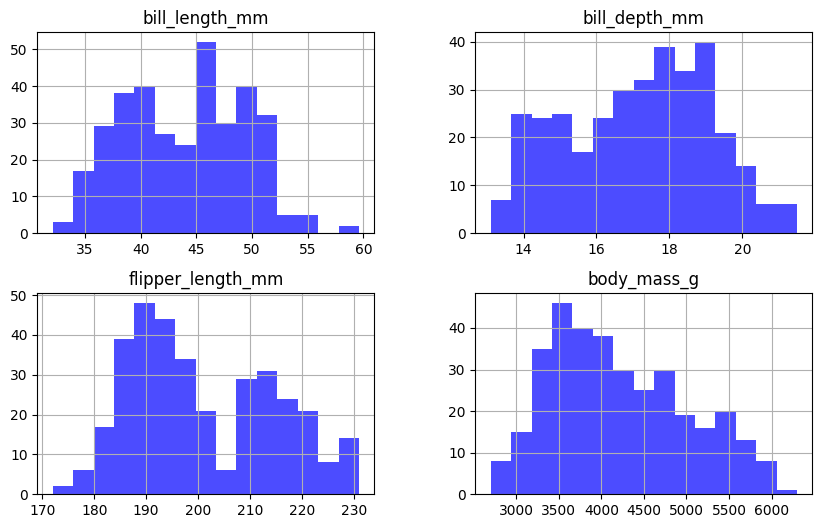

In [47]:
import seaborn as sns
import matplotlib as plt

numeric_features = df_encoded.select_dtypes(include=['number']).columns
df_encoded[numeric_features].hist(bins=15,figsize=(10,6),color='blue',alpha=0.7)
plt.suptitle("연속형 변수의 분포")
plt.show()


In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_encoded[numeric_features])
plt.show()

TypeError: 'module' object is not callable

In [49]:
df_encoded.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,39.10000,18.70000,181.000000,3750.000000,False,False,False,True,True
1,39.50000,17.40000,186.000000,3800.000000,False,False,False,True,False
2,40.30000,18.00000,195.000000,3250.000000,False,False,False,True,False
3,43.92193,17.15117,200.915205,4201.754386,False,False,False,True,True
4,36.70000,19.30000,193.000000,3450.000000,False,False,False,True,False


AttributeError: module 'matplotlib' has no attribute 'title'

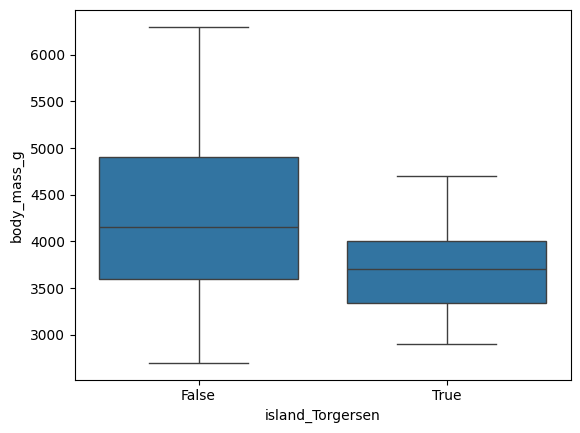

In [50]:
sns.boxplot(data=df_encoded, x='island_Torgersen', y='body_mass_g')
plt.title("Torgersen 섬 여부에 따른 몸무게 분포")
plt.xlabel("Torgersen 섬 여부")
plt.ylabel("몸무게 (g)")
plt.show()

C:\Users\imeun\AppData\Local\Temp\ipykernel_15852\1381683044.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_encoded, x='sex_Male', y='flipper_length_mm', palette='pastel')


AttributeError: module 'matplotlib' has no attribute 'title'

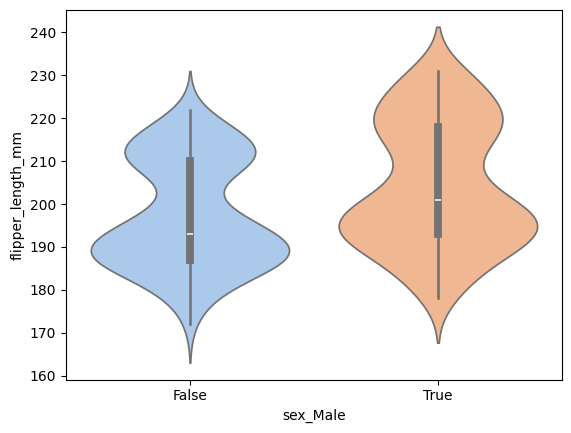

In [51]:
sns.violinplot(data=df_encoded, x='sex_Male', y='flipper_length_mm', palette='pastel')
plt.title("성별에 따른 지느러미 길이 분포")
plt.xlabel("성별 (1: 남성, 0: 여성)")
plt.ylabel("지느러미 길이 (mm)")
plt.show()

AttributeError: module 'matplotlib' has no attribute 'title'

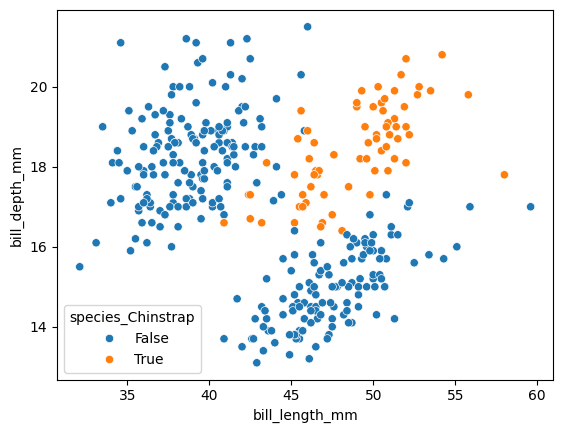

In [52]:
sns.scatterplot(data=df_encoded, x='bill_length_mm', y='bill_depth_mm', hue='species_Chinstrap')
plt.title("부리 길이와 깊이 간 관계")
plt.xlabel("부리 길이 (mm)")
plt.ylabel("부리 깊이 (mm)")
plt.legend(title="Chinstrap 종 여부")
plt.show()

In [53]:
# 라이브러리 임포트
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
y_train = y_train.argmax(axis=1) 
y_test = y_test.argmax(axis=1)
# 가장 큰 값을 갖는 열의 이름을 반환

# 변환 후 확인
print(y_train.head())

ValueError: `axis` must be fewer than the number of dimensions (1)

In [64]:
y_test = y_test.idxmax(axis=1)
# 가장 큰 값을 갖는 열의 이름을 반환

# 변환 후 확인
print(y_test.head())

177    species_Chinstrap
91     species_Chinstrap
104    species_Chinstrap
329       species_Gentoo
147    species_Chinstrap
dtype: object


In [65]:
y_valid = y_valid.idxmax(axis=1)

In [66]:
# Logistic Regression 모델 학습
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [67]:
# 테스트 및 검증 데이터 예측
logistic_pred_test  = logistic_model.predict(X_test)
logistic_pred_valid = logistic_model.predict(X_valid)

In [68]:
# 성능 평가
print("=== Logistic Regression 성능 ===")
print("테스트 데이터 정확도:", accuracy_score(y_test, logistic_pred_test))
print("검증 데이터 정확도:", accuracy_score(y_valid, logistic_pred_valid))

=== Logistic Regression 성능 ===
테스트 데이터 정확도: 1.0
검증 데이터 정확도: 1.0


In [69]:
# Random Forest 모델 학습 평가
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [71]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
pred_valid = rf_clf.predict(X_valid)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy))
accuracy_valid = accuracy_score(y_valid, pred_valid)
print('랜덤 포레스트 검증데이터 정확도: {:.4f}'.format(accuracy_valid))

랜덤 포레스트 정확도: 1.0000
랜덤 포레스트 검증데이터 정확도: 1.0000


## 회귀모델

In [357]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import plot_model


In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=321)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,  test_size=0.33, random_state=321)


In [304]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_valid = scaler.fit_transform(X_valid)

In [305]:
# 불러온 모듈을 model 변수에 할당
model = RandomForestRegressor(random_state = 42)

# 학습을 진행
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [306]:
y_pred_test = model.predict(X_test)
y_pred_valid = model.predict(X_valid)

In [307]:
# 평가 지표 계산 (테스트 데이터)
mse_test = mean_squared_error(y_test,y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [308]:
# 평가 지표 계산 (검증 데이터)
mse_valid = mean_squared_error(y_valid, y_pred_valid)
r2_valid = r2_score(y_valid,y_pred_valid)

In [309]:
# 결과 출력
print("=== 테스트 데이터 평가 ===")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared (R²):", r2_test)

print("\n=== 검증 데이터 평가 ===")
print("Mean Squared Error (MSE):", mse_valid)
print("R-squared (R²):", r2_valid)

=== 테스트 데이터 평가 ===
Mean Squared Error (MSE): 0.3710952618879973
R-squared (R²): 0.7249353955219572

=== 검증 데이터 평가 ===
Mean Squared Error (MSE): 0.6672365953367078
R-squared (R²): 0.48979104515724414


In [331]:
# 딥러닝
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as plt
from sklearn.preprocessing import OneHotEncoder

In [332]:
# Titanic 데이터셋 로드
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [333]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [334]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [335]:
# 결측치 처리
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [336]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [337]:
df = df.drop(columns=["Cabin"])

In [338]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [339]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [340]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [341]:
df = df.drop(columns=['Name','Ticket'])

In [342]:
categorical_columns =df.select_dtypes(include=['object'])
categorical_columns

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [343]:
df = pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)

In [344]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,True,False,True
1,2,1,1,38.000000,1,0,71.2833,False,False,False
2,3,1,3,26.000000,0,0,7.9250,False,False,True
3,4,1,1,35.000000,1,0,53.1000,False,False,True
4,5,0,3,35.000000,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,True,False,True
887,888,1,1,19.000000,0,0,30.0000,False,False,True
888,889,0,3,29.699118,1,2,23.4500,False,False,True
889,890,1,1,26.000000,0,0,30.0000,True,False,False


In [345]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [346]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=43)

In [347]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=43)

In [348]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
587,588,1,60.000000,1,1,79.2000,True,False,False
192,193,3,19.000000,1,0,7.8542,False,False,True
42,43,3,29.699118,0,0,7.8958,True,False,False
831,832,2,0.830000,1,1,18.7500,True,False,True
52,53,1,49.000000,1,0,76.7292,False,False,False
...,...,...,...,...,...,...,...,...,...
562,563,2,28.000000,0,0,13.5000,True,False,True
398,399,2,23.000000,0,0,10.5000,True,False,True
21,22,2,34.000000,0,0,13.0000,True,False,True
864,865,2,24.000000,0,0,13.0000,True,False,True


In [349]:
X_train.shape

(501, 9)

In [350]:
y_train.shape

(501,)

In [351]:

# 데이터에 Standardization 적용
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
X_valid= scaler.fit_transform(X_valid)


In [352]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=9, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [353]:
# 딥러닝 모델을 실행
model.compile(loss='binary_crossentropy', optimizer='adam',
metrics=['accuracy'])
history = model.fit(X_train, y_train,validation_data=(X_valid,y_valid), epochs=5, batch_size=16)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7156 - loss: 0.6413 - val_accuracy: 0.7006 - val_loss: 0.5579
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8309 - loss: 0.4957 - val_accuracy: 0.7904 - val_loss: 0.4933
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8330 - loss: 0.4367 - val_accuracy: 0.7904 - val_loss: 0.4636
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8429 - loss: 0.3867 - val_accuracy: 0.7964 - val_loss: 0.4554
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8472 - loss: 0.3811 - val_accuracy: 0.8024 - val_loss: 0.4485


In [355]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,261 (32.27 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,508 (21.52 KB)

In [361]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/1.8 MB 9.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2
Note: you may need to restart the kernel to use updated packages.


In [362]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [363]:
plot_model(model, show_shapes=True, to_file='model.png')

You must install pydot (`pip install pydot`) for `plot_model` to work.
